# Pandas Tutorial

In [31]:
import pandas



# Topic 1:  Input & Output

### Define input & output paths
The pandas I/O API is a set of top level reader functions accessed like pandas.read_csv() that generally return a pandas object. The corresponding writer functions are object methods that are accessed like DataFrame.to_csv(). Below is a table containing available readers and writers.

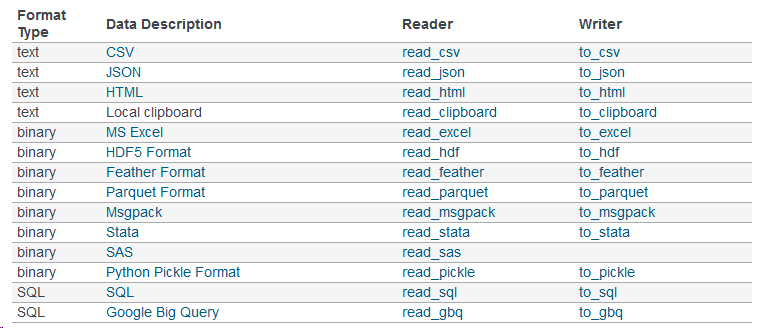

In [32]:

fuel_cost_data_set_path = "data/datasets/fuel_cost_data.csv"
fuel_cost_data_set_processed_path = "data/processed/scaled_fuel_cost_data.csv"

### Read csv as pandas dataframe & describe

In [33]:
fuel_cost_data_frame = pandas.read_csv(fuel_cost_data_set_path)
print fuel_cost_data_frame.describe()

         fuel_cost  toll_cost   misc_cost
count    31.000000  31.000000   31.000000
mean    684.048387  17.587097   42.741935
std    1154.536562  13.032977   20.904494
min      22.000000  10.200000   20.000000
25%     223.000000  12.000000   28.000000
50%     344.000000  14.000000   36.000000
75%     557.500000  15.200000   59.000000
max    5959.000000  56.000000  100.000000


### Scale dataframe

In [34]:
fuel_cost_data_frame["scaled_fuel_cost"] = fuel_cost_data_frame["fuel_cost"] / 100.0

### Save to CSV & show dataframe

In [35]:
print fuel_cost_data_frame[:10]
fuel_cost_data_frame.to_csv(fuel_cost_data_set_processed_path)

         Date  fuel_cost  toll_cost  misc_cost  scaled_fuel_cost
0  2018-07-01      123.5       10.2        100             1.235
1  2018-07-02      256.0       56.0        100             2.560
2  2018-07-03       45.0       15.2         20             0.450
3  2018-07-04      223.0       12.0         36             2.230
4  2018-07-05      445.0       14.0         59             4.450
5  2018-07-06      999.0       11.0         48             9.990
6  2018-07-07      444.0       15.0         20             4.440
7  2018-07-08      565.0       12.0         36             5.650
8  2018-07-09     3232.0       16.0         59            32.320
9  2018-07-10      484.0       12.0         20             4.840





# Topic 2:  Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index

In [37]:
type(fuel_cost_data_frame["Date"])

pandas.core.series.Series

In [39]:
print fuel_cost_data_frame["Date"][:10]

0    2018-07-01
1    2018-07-02
2    2018-07-03
3    2018-07-04
4    2018-07-05
5    2018-07-06
6    2018-07-07
7    2018-07-08
8    2018-07-09
9    2018-07-10
Name: Date, dtype: object


# Topic 3:   Indexing & Selection
### 1) loc slices data frame till the specified index (Included) <br>
Access a group of rows and columns by label(s)<br>
.loc[] is primarily label based<br>
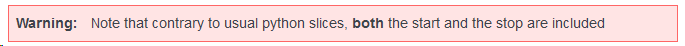
### 2) iloc slices data frame till the specified index irrespective of arrangement of index <br> 
Purely integer-location based indexing for selection by position.
### 3) iloc works like direct slicing using [ ] <br>

In [45]:
fuel_cost_data_frame.loc[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
0,2018-07-01,123.5,10.2,100,1.235
1,2018-07-02,256.0,56.0,100,2.560
2,2018-07-03,45.0,15.2,20,0.450


In [46]:
fuel_cost_data_frame.iloc[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
0,2018-07-01,123.5,10.2,100,1.235
1,2018-07-02,256.0,56.0,100,2.560


### loc & iloc when index is not sorted

In [47]:
fuel_cost_data_frame.sort_values('fuel_cost').loc[:2]
                                 

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
25,2018-07-26,22.0,10.2,48,0.22
16,2018-07-17,33.0,15.0,59,0.33
28,2018-07-29,35.0,12.0,36,0.35
2,2018-07-03,45.0,15.2,20,0.45


In [48]:
fuel_cost_data_frame.sort_values('fuel_cost').iloc[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
25,2018-07-26,22.0,10.2,48,0.22
16,2018-07-17,33.0,15.0,59,0.33


In [49]:
fuel_cost_data_frame.sort_values('fuel_cost')[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
25,2018-07-26,22.0,10.2,48,0.22
16,2018-07-17,33.0,15.0,59,0.33


### Selecting columns 

In [54]:
fuel_cost_data_frame[["Date", "fuel_cost"]][:2]

,Date,fuel_cost
0,2018-07-01,123.5
1,2018-07-02,256.0


# Topic 4:   Filtering

In [55]:
print fuel_cost_data_frame[fuel_cost_data_frame["Date"] < '2018-07-03']

         Date  fuel_cost  toll_cost  misc_cost  scaled_fuel_cost
0  2018-07-01      123.5       10.2        100             1.235
1  2018-07-02      256.0       56.0        100             2.560


In [59]:
print fuel_cost_data_frame[(fuel_cost_data_frame["Date"] < '2018-07-04') & 
                           (fuel_cost_data_frame["Date"] > '2018-07-01')]

         Date  fuel_cost  toll_cost  misc_cost  scaled_fuel_cost
1  2018-07-02      256.0       56.0        100              2.56
2  2018-07-03       45.0       15.2         20              0.45


# Topic 5:   Iteration

In [61]:
for index, row in fuel_cost_data_frame[:3].iterrows():
    print index, row["Date"]

0 2018-07-01
1 2018-07-02
2 2018-07-03


In [66]:
for row in fuel_cost_data_frame[:3].itertuples():
    print getattr(row, "Date") 

2018-07-01
2018-07-02
2018-07-03


# Topic 6: Sorting

In [67]:
fuel_cost_data_frame.sort_values('fuel_cost').iloc[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
25,2018-07-26,22.0,10.2,48,0.22
16,2018-07-17,33.0,15.0,59,0.33


In [70]:
fuel_cost_data_frame.sort_values('fuel_cost').reset_index(drop=True).loc[:2]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
0,2018-07-26,22.0,10.2,48,0.22
1,2018-07-17,33.0,15.0,59,0.33
2,2018-07-29,35.0,12.0,36,0.35


# Topic 7: Group By

In [74]:
fuel_cost_data_frame["week_day"] = fuel_cost_data_frame["Date"].astype('datetime64[ns]').dt.weekday

In [77]:
fuel_cost_data_frame.groupby(['week_day']).mean()

,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
week_day,,,,
0,1142.00,21.80,52.60,11.4200
1,289.80,16.24,31.00,2.8980
2,193.75,11.55,37.75,1.9375
3,255.25,24.05,50.50,2.5525
4,1944.00,24.05,43.75,19.4400
5,669.25,13.30,28.00,6.6925
6,359.50,12.64,53.40,3.5950


In [78]:
fuel_cost_data_frame.groupby(['week_day']).max()

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost
week_day,,,,,
0,2018-07-30,3232.0,56.0,100,32.32
1,2018-07-31,555.0,23.0,59,5.55
2,2018-07-25,344.0,12.0,59,3.44
3,2018-07-26,445.0,56.0,59,4.45
4,2018-07-27,5959.0,56.0,59,59.59
5,2018-07-28,1515.0,15.2,36,15.15
6,2018-07-29,565.0,15.0,100,5.65


# Topic 8: Rolling Operations

In [81]:
fuel_cost_data_frame.rolling(3).agg({'fuel_cost':'sum', 'toll_cost':'min'})[:5]

,toll_cost,fuel_cost
0,NaN,NaN
1,NaN,NaN
2,10.2,424.5
3,12.0,524.0
4,12.0,713.0


# Topic 9: Pivot
Return reshaped DataFrame organized by given index / column values.

In [83]:
pivot_df = pandas.DataFrame({'foo': ['one', 'one', 'one', 'two', 'two',
                               'two'],
                       'bar': ['A', 'B', 'C', 'A', 'B', 'C'],
                       'baz': [1, 2, 3, 4, 5, 6],
                       'zoo': ['x', 'y', 'z', 'q', 'w', 't']})

In [84]:
pivot_df

,bar,baz,foo,zoo
0,A,1,one,x
1,B,2,one,y
2,C,3,one,z
3,A,4,two,q
4,B,5,two,w
5,C,6,two,t


In [86]:
pivot_df.pivot(index='foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


# Topic 10: Melt
Pandas.melt() unpivots a DataFrame from wide format to long format.
melt() function is useful to massage a DataFrame into a format where one or more columns are identifier variables, while all other columns, considered measured variables, are unpivoted to the row axis, leaving just two non-identifier columns, variable and value.

In [91]:
 pandas.melt(
     fuel_cost_data_frame[:5][["Date", "fuel_cost", "toll_cost"]], 
                          id_vars=["Date"], 
                          var_name="Cost Type", 
                          value_name="Cost Value")

,Date,Cost Type,Cost Value
0,2018-07-01,fuel_cost,123.5
1,2018-07-02,fuel_cost,256.0
2,2018-07-03,fuel_cost,45.0
3,2018-07-04,fuel_cost,223.0
4,2018-07-05,fuel_cost,445.0
5,2018-07-01,toll_cost,10.2
6,2018-07-02,toll_cost,56.0
7,2018-07-03,toll_cost,15.2
8,2018-07-04,toll_cost,12.0
9,2018-07-05,toll_cost,14.0


# Topic 11: Concat, Merge and Join

In [100]:
inspection_cost_on_sundays = fuel_cost_data_frame[fuel_cost_data_frame["week_day"] == 6][["Date", "week_day"]]

In [104]:
inspection_cost_on_sundays["inspection_cost"] = 50

In [107]:
inspection_cost_on_sundays.reset_index(drop=True, inplace=True)
inspection_cost_on_sundays

,Date,week_day,inspection_cost
0,2018-07-01,6,50
1,2018-07-08,6,50
2,2018-07-15,6,50
3,2018-07-22,6,50
4,2018-07-29,6,50


In [110]:
pandas.merge(fuel_cost_data_frame, inspection_cost_on_sundays, how="inner", on="Date")

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost,week_day_x,week_day_y,inspection_cost
0,2018-07-01,123.5,10.2,100,1.235,6,6,50
1,2018-07-08,565.0,12.0,36,5.650,6,6,50
2,2018-07-15,559.0,14.0,36,5.590,6,6,50
3,2018-07-22,515.0,15.0,59,5.150,6,6,50
4,2018-07-29,35.0,12.0,36,0.350,6,6,50


In [113]:
pandas.merge(fuel_cost_data_frame, inspection_cost_on_sundays, how="inner", on="week_day")[:15]

,Date_x,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost,week_day,Date_y,inspection_cost
0,2018-07-01,123.5,10.2,100,1.235,6,2018-07-01,50
1,2018-07-01,123.5,10.2,100,1.235,6,2018-07-08,50
2,2018-07-01,123.5,10.2,100,1.235,6,2018-07-15,50
3,2018-07-01,123.5,10.2,100,1.235,6,2018-07-22,50
4,2018-07-01,123.5,10.2,100,1.235,6,2018-07-29,50
5,2018-07-08,565.0,12.0,36,5.650,6,2018-07-01,50
6,2018-07-08,565.0,12.0,36,5.650,6,2018-07-08,50
7,2018-07-08,565.0,12.0,36,5.650,6,2018-07-15,50
8,2018-07-08,565.0,12.0,36,5.650,6,2018-07-22,50
9,2018-07-08,565.0,12.0,36,5.650,6,2018-07-29,50


In [114]:
pandas.merge(fuel_cost_data_frame, inspection_cost_on_sundays, how="outer", on="Date")[:15]

,Date,fuel_cost,toll_cost,misc_cost,scaled_fuel_cost,week_day_x,week_day_y,inspection_cost
0,2018-07-01,123.5,10.2,100,1.235,6,6.0,50.0
1,2018-07-02,256.0,56.0,100,2.560,0,NaN,NaN
2,2018-07-03,45.0,15.2,20,0.450,1,NaN,NaN
3,2018-07-04,223.0,12.0,36,2.230,2,NaN,NaN
4,2018-07-05,445.0,14.0,59,4.450,3,NaN,NaN
5,2018-07-06,999.0,11.0,48,9.990,4,NaN,NaN
6,2018-07-07,444.0,15.0,20,4.440,5,NaN,NaN
7,2018-07-08,565.0,12.0,36,5.650,6,6.0,50.0
8,2018-07-09,3232.0,16.0,59,32.320,0,NaN,NaN
9,2018-07-10,484.0,12.0,20,4.840,1,NaN,NaN


In [115]:
df1 = pandas.DataFrame([['a', 1], ['b', 2]], columns=['letter', 'number'])
df2 = pandas.DataFrame([['a', 3], ['b', 2]], columns=['letter', 'number'])

In [116]:
pandas.concat([df1, df2])

,letter,number
0,a,1
1,b,2
0,a,3
1,b,2


## Plotting (Better to use native matplotlib)

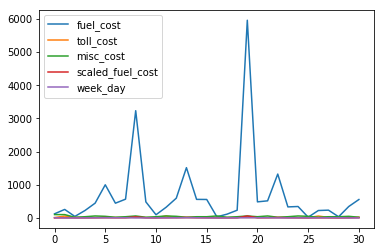

In [121]:
fuel_cost_data_frame.plot();
